In [1]:
# Import packages for data cleaning and visualization
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_31313/3714406789.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


We know from the paper attached to the Kaggle posting that both of these hotels are located in Portugal, with one hotel being a resort hotel, and another being a city hotel.

In [54]:
# Load the hotel booking data 
bookings = pd.read_csv('/Users/tonymoceri/MSBDSA/personal_projects/datasets/hotel_bookings.csv')

In [55]:
# Taking a quick peak at the data
bookings.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [56]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

<Axes: >

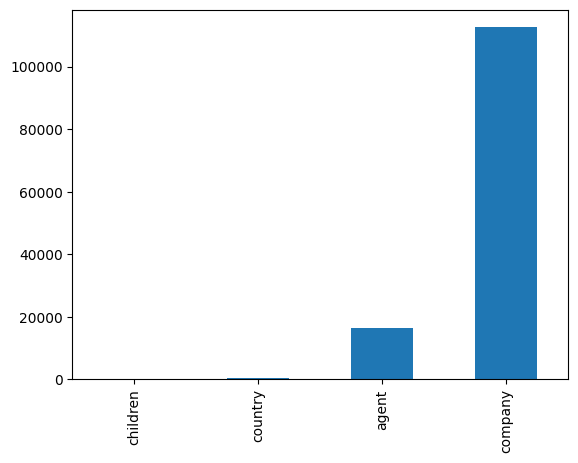

In [57]:
# Let's start of by seeing which columns have the most missing values 
missing = bookings.isnull().sum()
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar()

In [58]:
# We can see that the company column and agent column have the most missing values. Let's put this in context a bit more by looking at the percentage of missing values in each column
missing = bookings.isnull().mean() * 100
missing = missing[missing > 0]
missing.sort_values(inplace=True)
print(missing)

children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


In [59]:
# We can assume by reading the paper that the NaN values for company and agent are due to the fact that the booking was made without an agent or company. We can fill these values with 0.
bookings['agent'] = bookings['agent'].fillna(0)
bookings['company'] = bookings['company'].fillna(0)

In [60]:
# For the remaining columns with missing values, we can fill them with the mean of the column
bookings['children'] = bookings['children'].fillna(bookings['children'].mean())
bookings['country'] = bookings['country'].fillna(bookings['country'].mode()[0])


In [61]:
# Alright, now let's get information about the data
bookings.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [62]:
# We can see that nearly 40% of the bookings were canceled. It would be nice for the hotel to be able to predict which bookings have a high probability of being canceled. We will look into this later, but for now, let's answer a few questions about the data.

1. Where are the guests coming from? 
2. How much do guests pay for a room per night in each hotel? 
3. Are there seasonal variations in the average price per night? 
4. Which months and days of the week are the busiest? 
5. On average, how long do people stay at each hotel? 
6. What do the bookings look like by market segment?
7. Of the cancellations, what are some characteristics shared amongst cancelled visits? Are there certain times of year where cancellations are more frequent? 

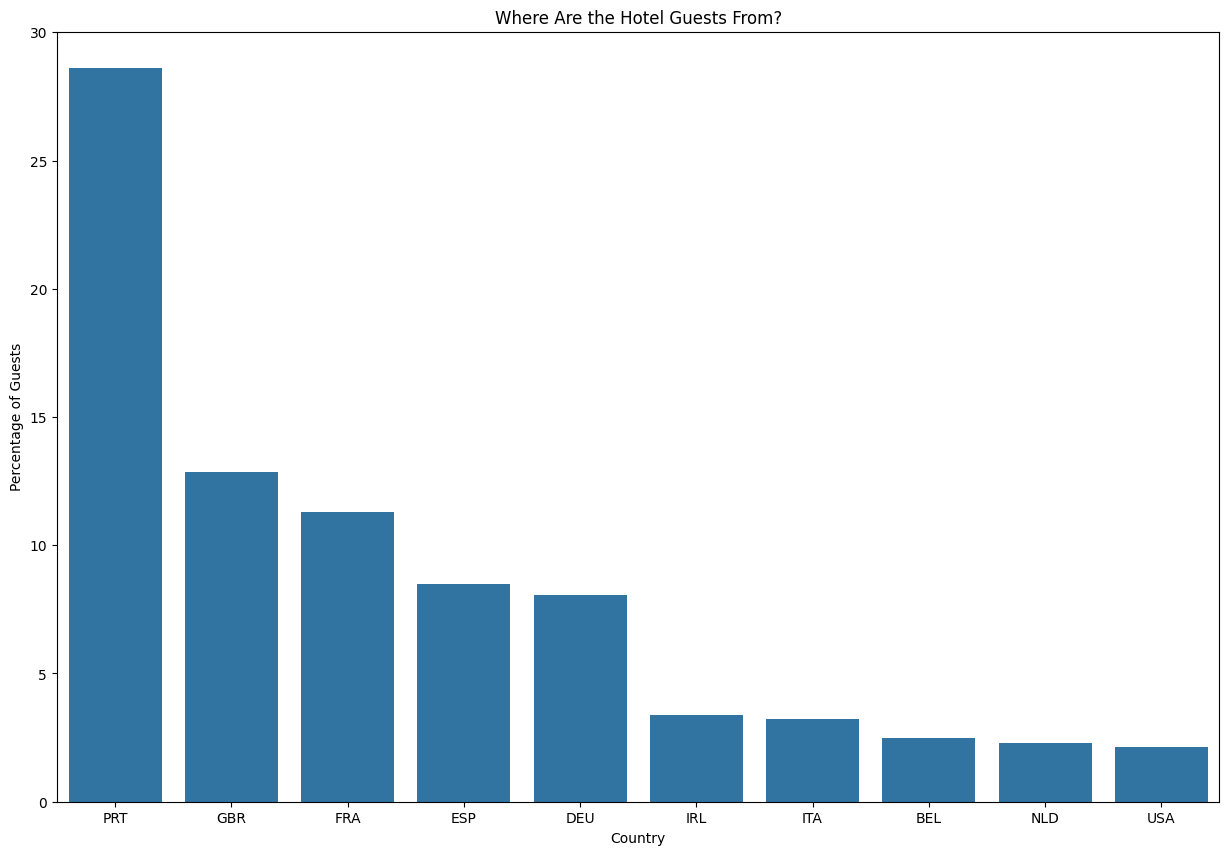

In [63]:
# Let's start with where the majority of the guests come from

# first, we need to get actual number of guests from each country, aka where the cancelation rate is 0 
guests = bookings[bookings['is_canceled'] == 0]
guests = guests['country'].value_counts().reset_index()
guests.columns = ['country', 'guests']
total_guests = guests['guests'].sum()
guests['percentage'] = guests['guests'] / total_guests * 100
guests = guests.sort_values(by='percentage', ascending=False)

# Now we can plot the data
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='percentage', data=guests.head(10))
plt.title('Where Are the Hotel Guests From?')
plt.xlabel('Country')
plt.ylabel('Percentage of Guests')
plt.show()


/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_31313/1356092003.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


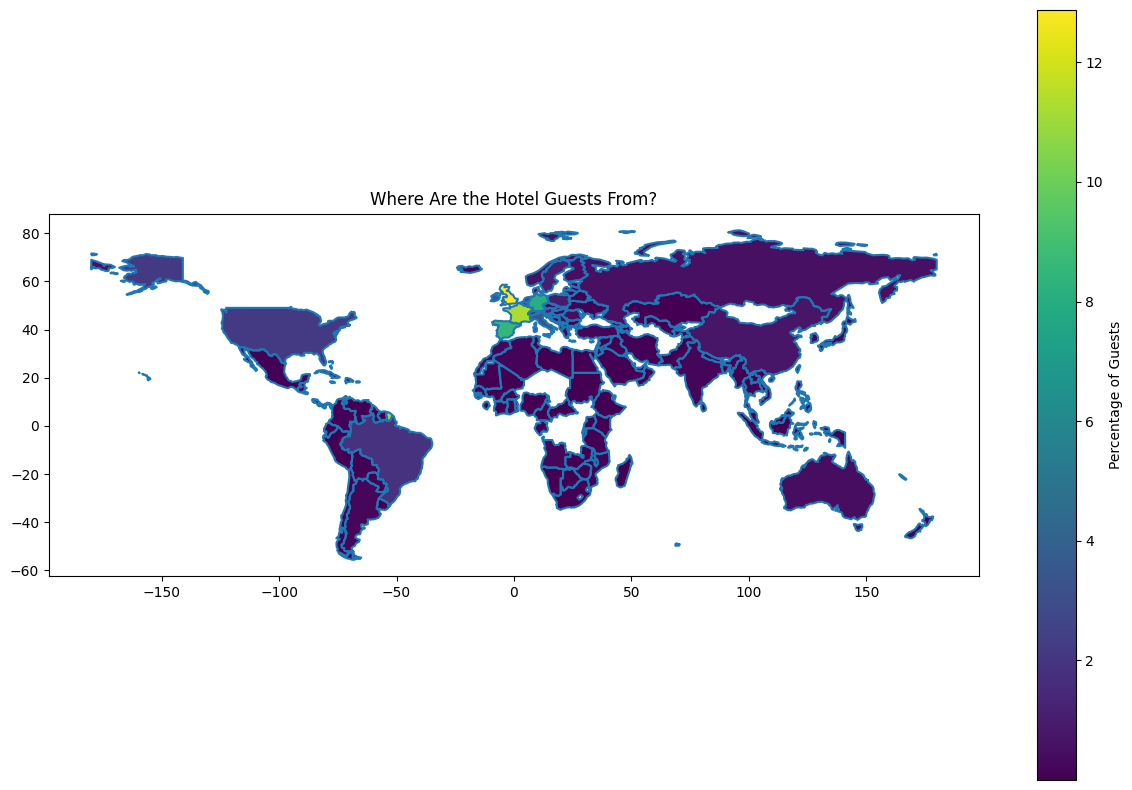

In [64]:
# Let's show this data on a map. 
import geopandas as gpd
from shapely.geometry import Point, Polygon

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# Merge the geopandas dataframe with the guests dataframe
guests = guests[guests['country'] != 'PRT']
world = world.merge(guests, left_on='iso_a3', right_on='country')
world = world.dropna()


# Plot the data
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world.boundary.plot(ax=ax)
world.plot(column='percentage', ax=ax, legend=True, legend_kwds={'label': "Percentage of Guests"})
plt.title('Where Are the Hotel Guests From?')
plt.show()

We can see that many of the guests are from Portugal, followed by Great Britan, France, Spain, and Germany.

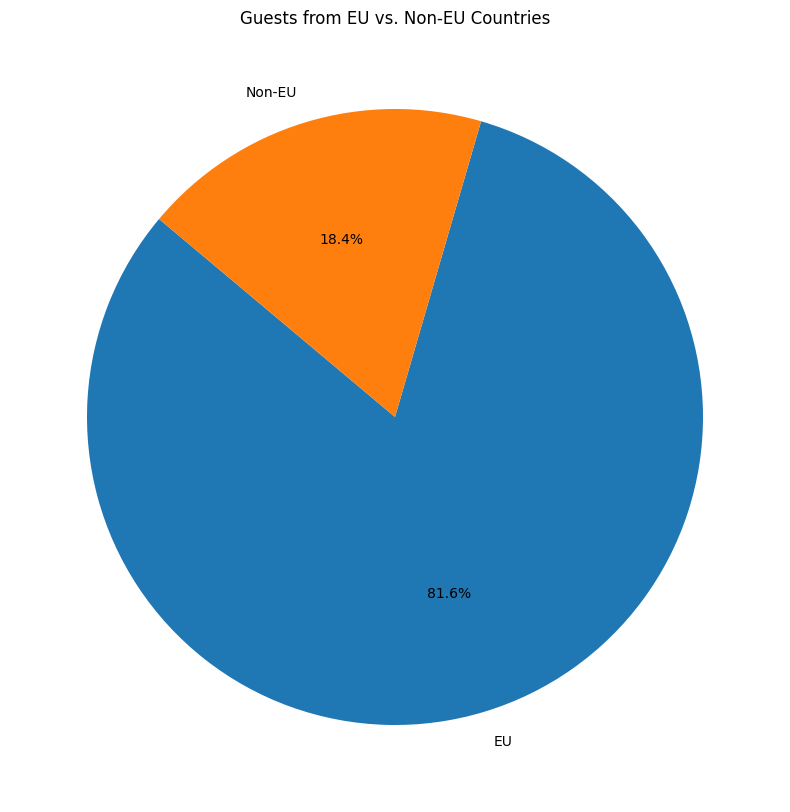

In [65]:
eu = ['AUT','BEL','BGR','HRV','CYP','CZE','DNK','EST','FIN','FRA','DEU','GRC','HUN','IRL','ITA','LVA','LTU','LUX','MLT','NLD','POL','PRT','ROU','SVK','SVN','ESP','SWE','GBR']

# Let's run a quick pie chart to see the guests from EU vs. non-EU countries
guests['eu'] = guests['country'].apply(lambda x: 'EU' if x in eu else 'Non-EU')
guests = guests.groupby('eu').sum()
guests['percentage'] = guests['guests'] / total_guests * 100
guests = guests.reset_index()
plt.figure(figsize=(10, 10))
plt.pie(guests['guests'], labels=guests['eu'], autopct='%1.1f%%', startangle=140)
plt.title('Guests from EU vs. Non-EU Countries')
plt.show()

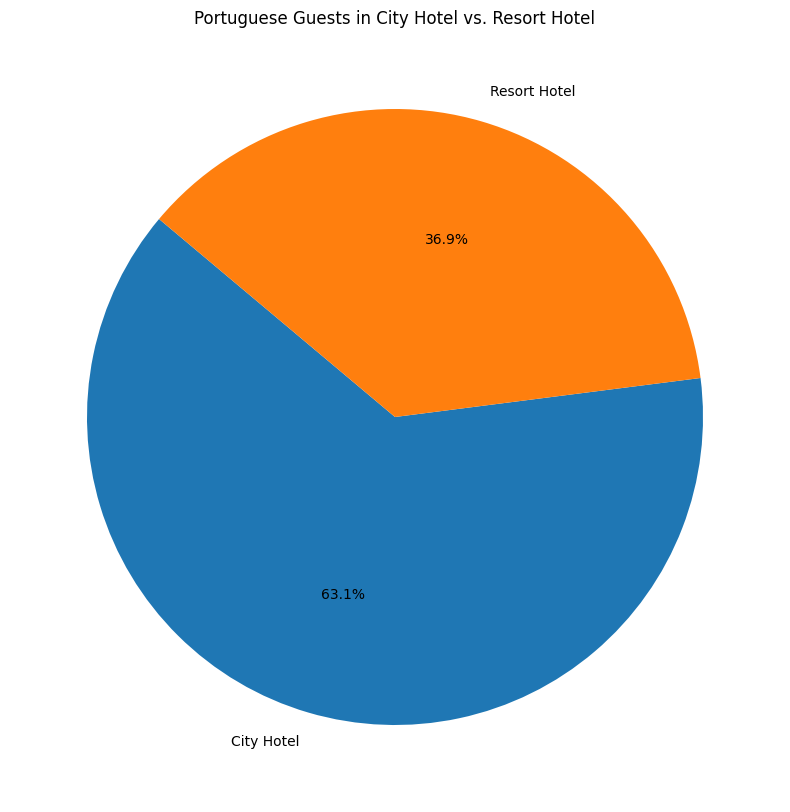

In [66]:
# Do guests who have a home country of portugal stay in city hotel or resort hotel?
portugal = bookings[bookings['country'] == 'PRT']
portugal = portugal['hotel'].value_counts().reset_index()
portugal.columns = ['hotel', 'count']
plt.figure(figsize=(10, 10))
plt.pie(portugal['count'], labels=portugal['hotel'], autopct='%1.1f%%', startangle=140)
plt.title('Portuguese Guests in City Hotel vs. Resort Hotel')
plt.show()

Interesting, many people who live in Portugal tend to stay in a city hotel vs. a resort hotel

## Let's move on to the second question. How much are guests paying on average, how much are they paying for each hotel, and is there a difference in how much guests from certain countries are paying for the same amount of time and room types?

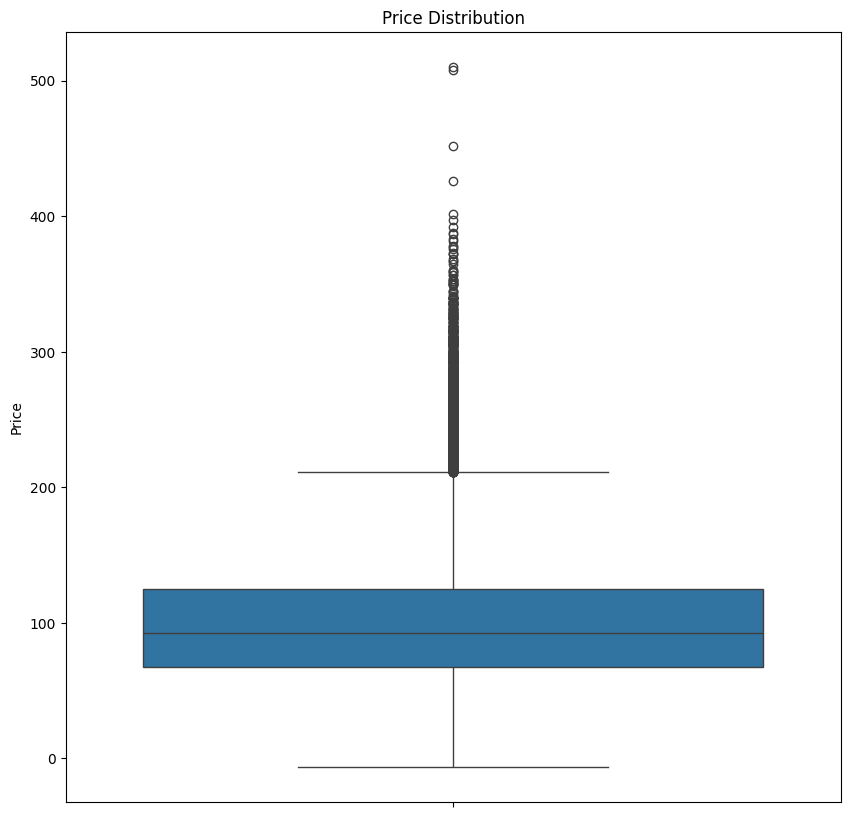

In [67]:
# How much are guests paying on average? 
price = bookings[bookings['is_canceled'] == 0]
price = price['adr']
plt.figure(figsize=(10, 10))
sns.boxplot(y=price)
plt.title('Price Distribution')
plt.ylabel('Price')
plt.show()

In [69]:
print(bookings['hotel'].unique())
print(price[bookings['hotel'] == 'Resort Hotel'].notna().sum())

['Resort Hotel' 'City Hotel']
28938


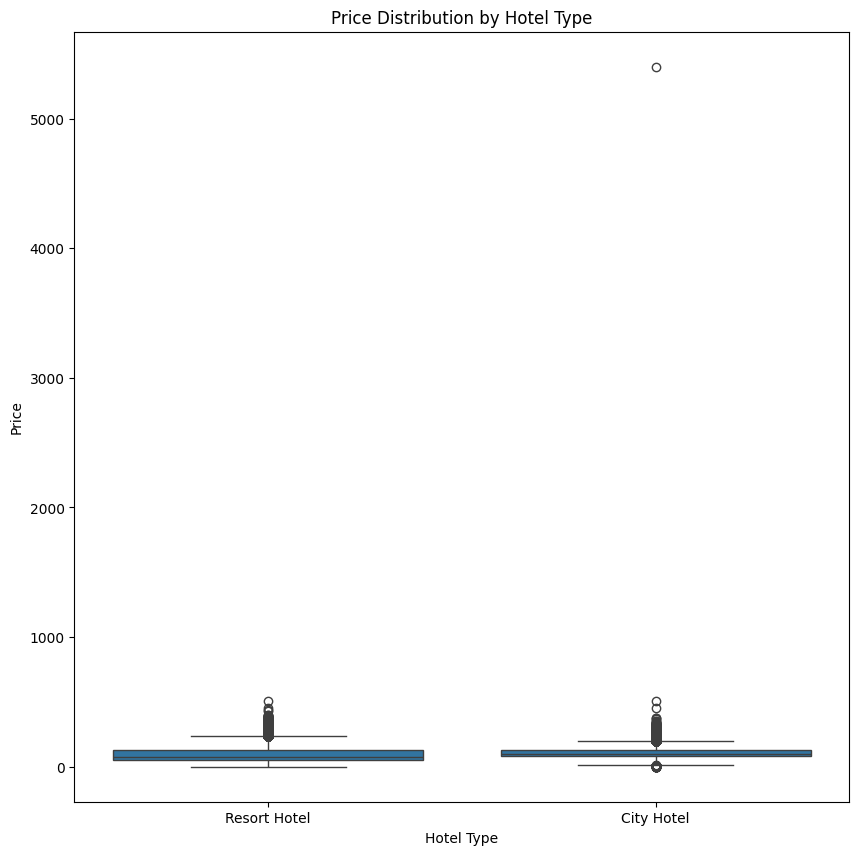

In [73]:
# Create a new DataFrame that contains both 'City Hotel' and 'Resort Hotel' data
hotel_prices = bookings[['hotel','adr']]
hotel_prices = hotel_prices[hotel_prices['adr'] > 0]

# Plot the data
plt.figure(figsize=(10, 10))
sns.boxplot(x='hotel', y='adr', data=hotel_prices)
plt.title('Price Distribution by Hotel Type')
plt.ylabel('Price')
plt.xlabel('Hotel Type')
plt.show()


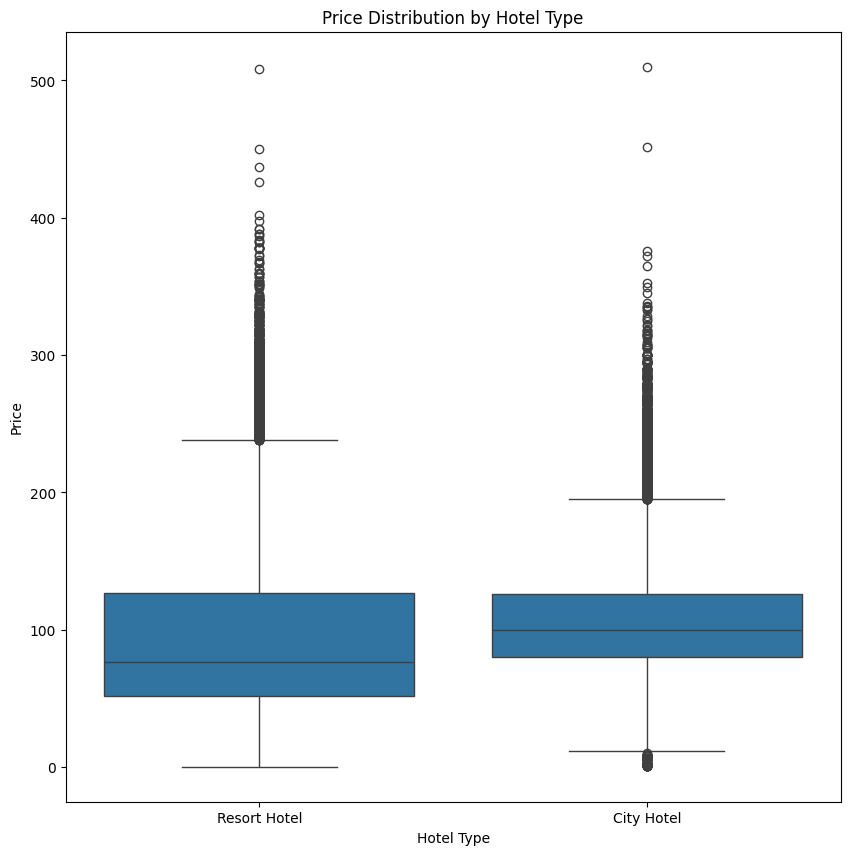

In [74]:
# For the city hotel, we can see there is an outlier that is significantly higher than the rest of the data. Let's remove this outlier and plot the data again. 
hotel_prices = hotel_prices[hotel_prices['adr'] < 1000]
plt.figure(figsize=(10, 10))
sns.boxplot(x='hotel', y='adr', data=hotel_prices)
plt.title('Price Distribution by Hotel Type')
plt.ylabel('Price')
plt.xlabel('Hotel Type')
plt.show()


#### Interesting. We can see that, on average, when looking at the distribution of ADR for all possible guests, lengths of stays, room types, etc., we see that the city hotel has a slightly higher average price than the resort hotel. However, the upper quartile of hte resort hotel is higher than the city hotel, indicated that a greater percentage of the ADRs are priced higher than the city hotels

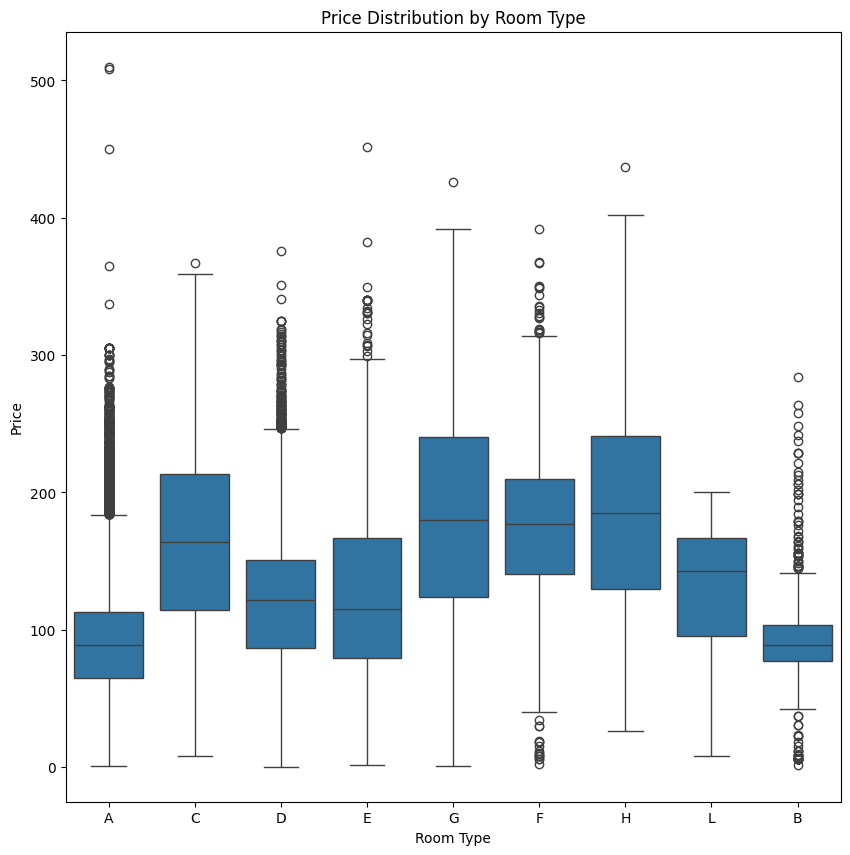

In [81]:
# Now we will see how price changes with room type 
room_prices = bookings[['reserved_room_type', 'adr']]
room_prices = room_prices[(room_prices['adr'] > 0) & (room_prices['adr'] < 1000)]
plt.figure(figsize=(10, 10))
sns.boxplot(x='reserved_room_type', y='adr', data=room_prices)
plt.title('Price Distribution by Room Type')
plt.ylabel('Price')
plt.xlabel('Room Type')
plt.show()

#### It is important as a guest to know how much you as an individual are paying per night. So let's look at the price per night per guest

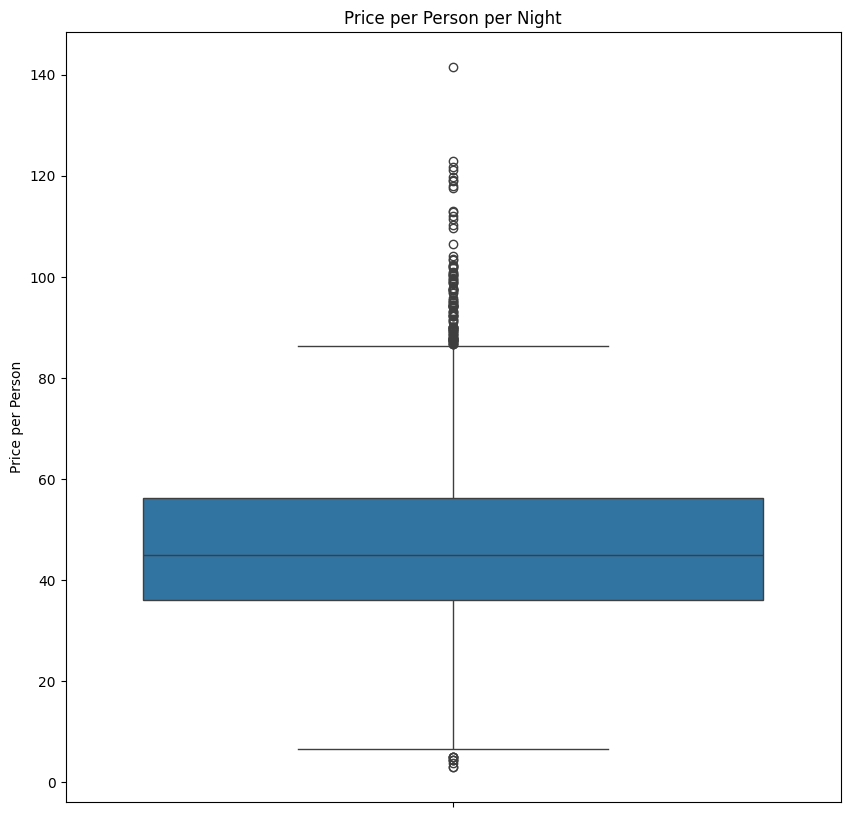

In [83]:
# Let's only count 1) the guests who did not cancel their booking and 2) the guests who are adults and children, not babies
guests = bookings[(bookings['is_canceled'] == 0) & (bookings['adults'] > 0) & (bookings['children'] > 0)]
guests = guests['adults'] + guests['children']

# Let's merge the guests dataframe with the adr from the bookings dataframe
guests = pd.DataFrame(guests)
guests['adr'] = bookings['adr']
guests = guests[guests['adr'] > 0]

# Now, let's get the price per person per night 
guests['price_per_person'] = guests['adr'] / guests[0]
guests = guests[['price_per_person', 0]]
guests.columns = ['price_per_person', 'guests']

# Plot the data
plt.figure(figsize=(10, 10))
sns.boxplot(y='price_per_person', data=guests)
plt.title('Price per Person per Night')
plt.ylabel('Price per Person')
plt.show()


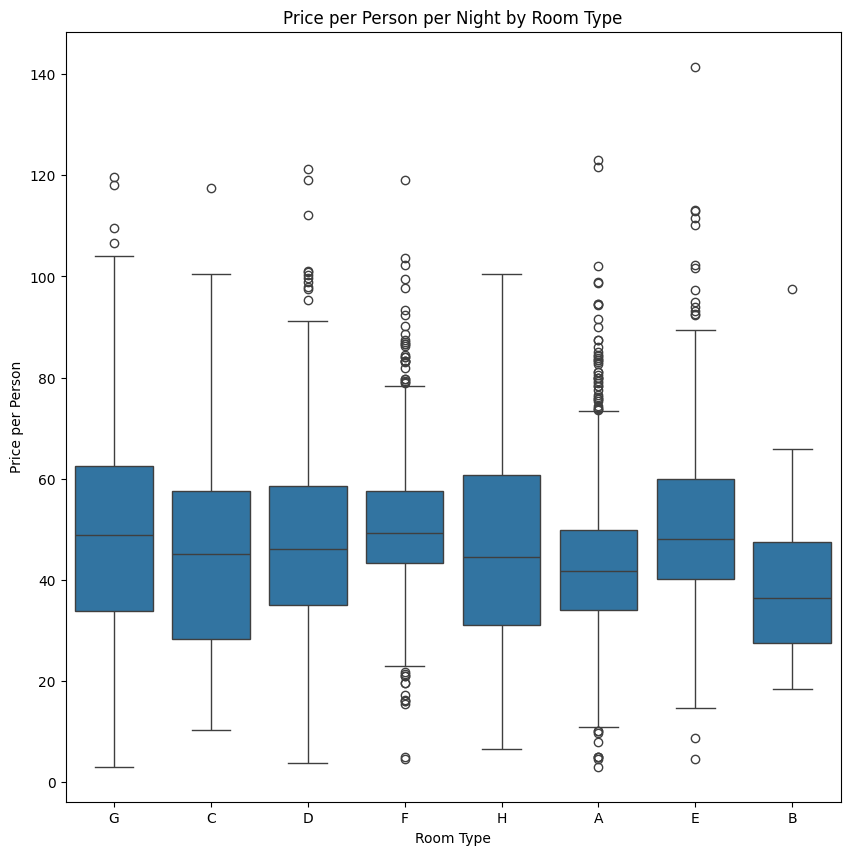

In [85]:
# Let's add the reserved room type column to the guests dataframe
guests['reserved_room_type'] = bookings['reserved_room_type']
guests = guests[guests['price_per_person'] < 1000]

# Now let's plot the price per person per night by room type 
plt.figure(figsize=(10, 10))
sns.boxplot(x='reserved_room_type', y='price_per_person', data=guests)
plt.title('Price per Person per Night by Room Type')
plt.ylabel('Price per Person')
plt.xlabel('Room Type')
plt.show()



#### It appears that, for the most part, the price per person per night stays relatively consistent between room types, with averages between ~$40 and ~$55. However, there are different room types for each hotel type, so there is still quite a bit of variability here. Let's look at one more thing before we move on to our next question. 

#### Is there a difference in price per person per night between different home countries?

In [94]:
# Let's add the countries column to the guests dataframe
guests['country'] = bookings['country']
guests = guests[guests['price_per_person'] < 1000]

# Let's make a table of the average price per person per night by country and sort by price descending
no_babies = bookings[(bookings['is_canceled'] == 0) & (bookings['adults'] > 0) & (bookings['children'] > 0)]
no_babies['price_per_person'] = no_babies['adr'] / (no_babies['adults'] + no_babies['children'])
no_babies = no_babies[['country', 'price_per_person']]
no_babies = no_babies.groupby('country').mean().reset_index()
no_babies = no_babies.sort_values(by='price_per_person', ascending=False)
print(no_babies)

   country  price_per_person
2      AND         88.500000
45     ISL         82.250000
23     DJI         68.250000
1      AIA         66.250000
35     GIB         63.166667
..     ...               ...
78     SVK         27.463333
60     MKD         27.187500
77     SUR         24.500000
91     ZMB         24.167500
17     COL         21.257500

[92 rows x 2 columns]


/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_31313/1986555329.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_babies['price_per_person'] = no_babies['adr'] / (no_babies['adults'] + no_babies['children'])


#### We can see that country does seem to have a difference in the price per person per night 

#### So far, we can tell from visual inspection that the things that affect price the most are the country and length of stay. Let's move on to our next question: __How does the time of year affect the price?__

/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_31313/2254383074.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  city = city.groupby('arrival_date_month')['adr'].mean().reset_index()
/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_31313/2254383074.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resort = resort.groupby('arrival_date_month')['adr'].mean().reset_index()


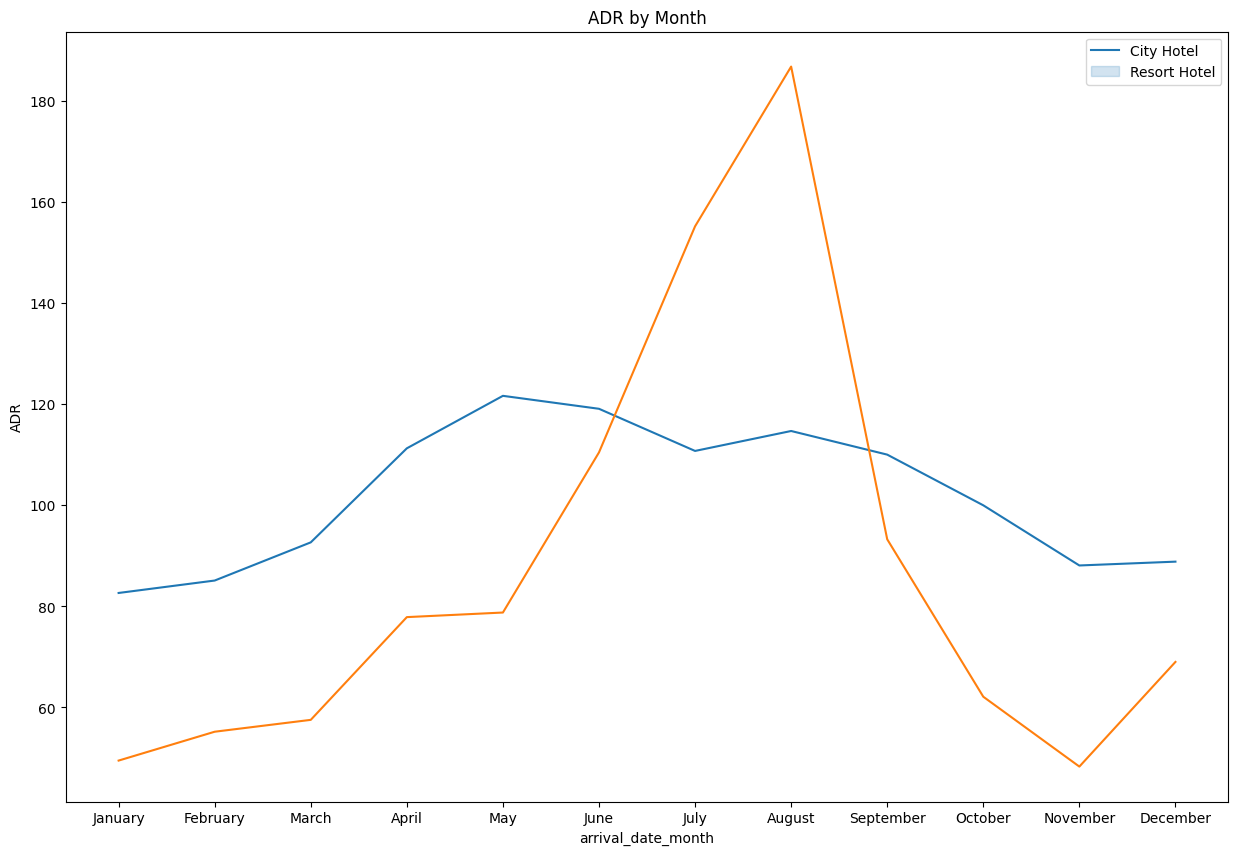

In [99]:
# Let's look at ADR aggregated by month for each hotel type
bookings['arrival_date_month'] = pd.Categorical(bookings['arrival_date_month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)
city = bookings[bookings['hotel'] == 'City Hotel']
resort = bookings[bookings['hotel'] == 'Resort Hotel']
city = city.groupby('arrival_date_month')['adr'].mean().reset_index()
resort = resort.groupby('arrival_date_month')['adr'].mean().reset_index()
plt.figure(figsize=(15, 10))
sns.lineplot(x='arrival_date_month', y='adr', data=city)
sns.lineplot(x='arrival_date_month', y='adr', data=resort)
plt.title('ADR by Month')
plt.ylabel('ADR')
plt.legend(['City Hotel', 'Resort Hotel'])
plt.show()

#### No surprises here! Easy to see that there is a very large difference in ADR variability between city and resort hotels, with city hotels ranging from about $80-$120, whereas resort hotels go from $50-$190, nearly a 75% increase between off-peak months in the winter, to summer rates peaking in August

## Let's see which variables are most useful for predicting cancellation. A model to predict cancellations could be helpful to these hotels

In [103]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   hotel                           119390 non-null  object  
 1   is_canceled                     119390 non-null  int64   
 2   lead_time                       119390 non-null  int64   
 3   arrival_date_year               119390 non-null  int64   
 4   arrival_date_month              119390 non-null  category
 5   arrival_date_week_number        119390 non-null  object  
 6   arrival_date_day_of_month       119390 non-null  int64   
 7   stays_in_weekend_nights         119390 non-null  int64   
 8   stays_in_week_nights            119390 non-null  int64   
 9   adults                          119390 non-null  int64   
 10  children                        119390 non-null  float64 
 11  babies                          119390 non-null  int64   
 12  me

In [104]:
# I'm going to look at the correlation between the cancellation rate and the other columns
city = bookings[bookings['hotel'] == 'City Hotel']  
resort = bookings[bookings['hotel'] == 'Resort Hotel']

In [105]:
# Converting the hotel column to a binary column, 1 for city hotel and 0 for resort hotel.
bookings['hotel'] = bookings['hotel'].apply(lambda x: 1 if x == 'City Hotel' else 0)

# Converting the is_repeated_guest column to a binary column, 1 for repeated guest and 0 for non-repeated guest.
bookings['is_repeated_guest'] = bookings['is_repeated_guest'].apply(lambda x: 1 if x == 1 else 0)

In [106]:
# Separate the data into numerical and categorical columns
numerical = bookings.select_dtypes(include=[np.number])
categorical = bookings.select_dtypes(exclude=[np.number])

# Let's look at the correlation between the numerical columns
cancel_corr = numerical.corr()['is_canceled']
cancel_corr.abs().sort_values(ascending=False)[1:]

lead_time                         0.293123
total_of_special_requests         0.234658
required_car_parking_spaces       0.195498
booking_changes                   0.144381
hotel                             0.136531
previous_cancellations            0.110133
is_repeated_guest                 0.084793
company                           0.082995
adults                            0.060017
previous_bookings_not_canceled    0.057358
days_in_waiting_list              0.054186
adr                               0.047557
agent                             0.046529
babies                            0.032491
stays_in_week_nights              0.024765
arrival_date_year                 0.016660
arrival_date_day_of_month         0.006130
children                          0.005048
stays_in_weekend_nights           0.001791
Name: is_canceled, dtype: float64

### We can see that lead time, number of special requests, required parking spaces, booking changes, and hotel type are most correlated

It's possible that booking_changes could be a source of data leakage since this information is constant. Obviously, we want to exclude "reservation status", since this would directly influence the results

In [109]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

features = num_features + cat_features

num_features = bookings[num_features]
cat_features = bookings[cat_features]

# one hot encoding the categorical columns
cat_features = pd.get_dummies(cat_features)

In [112]:
num_features.drop('arrival_date_week_number', axis=1, inplace=True)

# standardizing the numerical columns
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_features = pd.DataFrame(scaler.fit_transform(num_features), columns=num_features.columns)

# combining the numerical and categorical columns
features = pd.concat([num_features, cat_features], axis=1)


/var/folders/m5/qxcyvtcn2bd1qt6xxnplw0pw0000gn/T/ipykernel_31313/948692877.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  num_features.drop('arrival_date_week_number', axis=1, inplace=True)


In [113]:
features

,lead_time,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,reserved_room_type_H,reserved_room_type_L,reserved_room_type_P,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party
0,2.227051,-1.685297,-0.928890,-1.310240,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
1,5.923385,-1.685297,-0.928890,-1.310240,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
2,-0.907814,-1.685297,-0.928890,-0.786207,-1.478447,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
3,-0.851667,-1.685297,-0.928890,-0.786207,-1.478447,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
4,-0.842309,-1.685297,-0.928890,-0.262174,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,-0.758089,1.617366,1.073895,1.309924,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
119386,-0.018822,1.731251,1.073895,1.309924,1.974242,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
119387,-0.655153,1.731251,1.073895,1.309924,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
119388,0.046682,1.731251,1.073895,1.309924,0.247897,-0.260668,-0.081579,-0.18156,-0.10318,-0.091555,...,False,False,False,True,False,False,False,False,True,False
